<a href="https://colab.research.google.com/github/Sean-1005/JSC270_A4/blob/main/JSC270_A4Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
from google.colab import files
import io

In [52]:
api_key = 'v4IdZHk57NCd10ibBf2aRfNoW'

api_secret_key = 'DzgXn6Ne7UgIRBRa8NhEm3EI5E02R1JfXK06AfTQuXkJOTHaDK'

access_key =  '1107526326049632256-OSbgMkGepOw7DykXrtraeY1urr5nhP'

access_secret = '7cUYUn5sC8U1pLbJ6athh5rlPy3opr7J4GLOSfZbJ1JjQ'

In [53]:
import tweepy as tw
import pandas as pd

# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [54]:
def search_positive(search_words, num_item):
  search_with_filter = search_words + " -filter:retweets"
  date_since = "2020-01-01"
  word = tw.Cursor(api.search,
                        q=search_with_filter,
                        lang="en",
                        since=date_since,
                        result_type = 'recent').items(num_item)
  a = [tweet.text for tweet in word]
  df = pd.DataFrame(a, columns = ['tweet'])
  df['attitude'] = 1
  return df

def search_negative(search_words, num_item):
  search_with_filter = search_words + " -filter:retweets"
  date_since = "2020-01-01"
  word = tw.Cursor(api.search,
                        q=search_with_filter,
                        lang="en",
                        since=date_since,
                        result_type = 'recent').items(num_item)
  a = [tweet.text for tweet in word]
  df = pd.DataFrame(a, columns = ['tweet'])
  df['attitude'] = -1
  return df

Here are the codes that we used to searched and labeled the tweets about masks and we exported the datas to a csv file named as 'JSC270_A4Q2_dataset_mask.csv'

In [ ]:
# maskdf1 = search_positive('#maskon', 350)
# maskdf2 = search_positive('#wearmask', 400)
# maskdf3 = search_positive('#wearamask', 3000)
# n_maskdf1 = search_negative('#nomasks', 400)
# n_maskdf2 = search_negative('#TakeOffYourMask', 3000)
# n_maskdf3 = search_negative('#maskfree', 40)
# df = pd.concat([maskdf1, maskdf2, maskdf3, n_maskdf1, n_maskdf2, n_maskdf3], ignore_index=True)
# df = df.drop_duplicates()

In [8]:
#Upload JSC270_A4Q2_dataset_mask.csv in Github
df = files.upload()
df = pd.read_csv(io.BytesIO(df['JSC270_A4Q2_dataset_mask.csv']))


Saving JSC270_A4Q2_dataset_mask.csv to JSC270_A4Q2_dataset_mask (1).csv


In [9]:
df

,Unnamed: 0,tweet,attitude
0,0,4 safety tips for HITCH Users!\n\n1) Wear a ma...,1
1,1,"Alameda County Board of Supervisor, Wilma Chan...",1
2,2,Ando de vacaciones! First time inside an airpo...,1
3,3,DittoMask provides users with a face covering ...,1
4,4,Partner in crime. 👊🏻\n \n#maskon #brother #fri...,1
...,...,...,...
5185,5185,My community backed off a little. Masks are no...,-1
5186,5186,@camcurt13 @FOX10Phoenix I hate it. I’m #MaskF...,-1
5187,5187,When mask zealots express horror and disgust a...,-1
5188,5188,@BChant5 There’s no Basha’s near me. That Safe...,-1


1) Tokenize

In [12]:
def tokenize(df):
  token = []
  for tweet in df['tweet']:
    token.append(tweet.split())
  return token

In [13]:
df['tokens'] = tokenize(df)

2) Remove URL

In [14]:
import re

def no_links(df):
  tokens_no_links = []
  for tweet in df['tokens']:
    tokens_no_links.append([re.sub('^http.*$','', t) for t in tweet])
  return tokens_no_links

def no_at(df):
  tokens_no_at = []
  for tweet in df['tokens']:
    tokens_no_at.append([re.sub('^@.*$','', t) for t in tweet])
  return tokens_no_at


In [15]:
df['tokens'] = no_links(df)
df['tokens'] = no_at(df)

3) Remove tags that we used for searching

In [16]:
def remove_tag(df, tag):
  tokens = []
  for tweet in df['tokens']:
    tokens.append([re.sub(tag,'', t) for t in tweet])
  return tokens


In [17]:
df['tokens'] = remove_tag(df, '^#[mM][aA][sS][kK][oO][nN].*$')
df['tokens'] = remove_tag(df, '^#[wW][eE][aA][rR][mM][aA][sS][kK].*$')
df['tokens'] = remove_tag(df, '^#[wW][eE][aA][rR][aA][mM][aA][sS][kK].*$')
df['tokens'] = remove_tag(df, '^#[nN][oO][mM][aA][sS][kK][sS].*$')
df['tokens'] = remove_tag(df, '^#[tT][aA][kK][eE][oO][fF][fF][yY][oO][uU][rR][mM][aA][sS][kK].*$')
df['tokens'] = remove_tag(df, '^#[mM][aA][sS][kK][fF][rR][eE][eE].*$')

4) Remove all punctuation

In [18]:
def remove_punct(df):
  temp = []
  tokens_no_punct = []
  for row in df["tokens"]:
    temp.append([re.sub('[^\w\s]','', t) for t in row])
  for row in temp:
    tokens_no_punct.append([w for w in row if w != ''])
  return tokens_no_punct

# Covert all row into lowercase
def convert_lower(df):
  tokens_lowercase = []
  for row in df["tokens"]:
    tokens_lowercase.append([t.lower() for t in row])
  return tokens_lowercase



In [19]:
df["tokens"] = remove_punct(df)
df["tokens"] = convert_lower(df)

5) Stemming

In [20]:
from nltk.stem.porter import *

def stem(df):
  stemmer = PorterStemmer()
  stemed = []
  for tweet in df['tokens']:
    stemed.append([stemmer.stem(w) for w in tweet])
  return stemed


In [21]:
df["tokens"] = stem(df)

6) Remove Stopwords

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(df):
  sw = stopwords.words('english')[:1000]
  tokens_no_sw = []
  for row in df['tokens']:
    tokens_no_sw.append([w for w in row if w not in sw])
  return tokens_no_sw


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
df['tokens'] = remove_stopwords(df)

6) lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize(df):
  lemmatizer = WordNetLemmatizer()
  lem_tokens = []
  for row in df['tokens']:
    lem_tokens.append([lemmatizer.lemmatize(t) for t in row])
  return lem_tokens


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [25]:
df['tokens'] = lemmatize(df)

7) Count Vectorizing

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Separate labels from features, converting to numpy arrays
X, y = df['tokens'].to_numpy(), df['attitude'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts = count_vec.fit_transform(X)
print(counts.toarray())

# Print the names of each of the features (1000 total))
print(count_vec.get_feature_names())
# Print this mapping as dictionary
print(count_vec.vocabulary_)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['1', '10', '100', '12', '15', '16', '18', '19', '1st', '2', '20', '2020', '2021', '24', '25', '2nd', '3', '4', '5', '50', '6', '7', '8', '9', 'abl', 'abov', 'absolut', 'accept', 'accord', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'adult', 'advic', 'affect', 'age', 'ago', 'agre', 'ahead', 'aint', 'air', 'airport', 'alert', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'alway', 'amaz', 'american', 'amp', 'ani', 'announc', 'anoth', 'answer', 'antimask', 'anyon', 'anyth', 'anywher', 'apart', 'appear', 'appoint', 'approach', 'appropri', 'apr', 'april', 'area', 'arent', 'arm', 'around', 'arriv', 'art', 'as', 'ask', 'asymptomat', 'attempt', 'avail', 'averag', 'avoid', 'awar', 'away', 'awesom', 'b', 'b117', 'back', 'bad', 'bank', 'base', 'basic', 'battl', 'bay', 'beat', 'beauti', 'becaus', 'becom', 'befor', 'begin', 'behind', 'believ', 'benefit', 'b

In [27]:
positive = []
negative = []

X, y = df['tokens'].to_numpy(), df['attitude'].to_numpy()

for i in range(len(X)):
  if y[i] == 1:
    positive.append(X[i])
  else:
    negative.append(X[i])

count_vec_postop = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 5500)

# Remember this output is a Scipy Sparse Array
count_vec_postop.fit_transform(positive)

# Print the names of each of the features (1000 total))
token_freq_p = count_vec_postop.vocabulary_

count_vec_negtop = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 5500)

# Remember this output is a Scipy Sparse Array
count_vec_negtop.fit_transform(negative)

# Print the names of each of the features (1000 total))
token_freq_n = count_vec_negtop.vocabulary_


sort_orders_p = sorted(token_freq_p.items(), key=lambda x: x[1], reverse=True)
sort_orders_n = sorted(token_freq_n.items(), key=lambda x: x[1], reverse=True)

p = sorted(token_freq_p, key=token_freq_p.get, reverse=True)
n = sorted(token_freq_n, key=token_freq_n.get, reverse=True)

p_result = []
n_result = []

for i in p[:20]:
  if i not in n[:20]:
    p_result.append(i)
for i in n[:20]:
  if i not in p[:20]:
    n_result.append(i)

print(p_result)
print(n_result)


print("Top 20 words for 1: ", p[:20])
print("Top 20 words for -1: ", n[:20])

['𝘺𝘰𝘶𝘳', '𝘵𝘰', '𝘵𝘩𝘦', '𝘴𝘱𝘳𝘦𝘢𝘥𝘪𝘯𝘨', '𝘳𝘪𝘨𝘩𝘵', '𝘱𝘶𝘵𝘵𝘪𝘯𝘨', '𝘱𝘦𝘰𝘱', '𝘰𝘯', '𝘰𝘧', '𝘮𝘢𝘴𝘬', '𝘮𝘢𝘬𝘪𝘯𝘨', '𝘫𝘰𝘬𝘦𝘴', '𝘪𝘯𝘴𝘵𝘦𝘢𝘥', '𝘩𝘢𝘵𝘳𝘦𝘥', '𝘧𝘢𝘤𝘦', '𝘤𝘢𝘳𝘦', '𝘣𝘺', '𝘢𝘯𝘥', '𝘛𝘢𝘬𝘦', '𝗪𝗼𝗿𝗹𝗱']
['zombi', 'zero', 'zealot', 'z', 'yup', 'yr', 'ypur', 'youv', 'youthat', 'youngster', 'younger', 'young', 'youll', 'youd', 'yo', 'yet', 'yesterday', 'yep', 'yellow', 'yell']
Top 20 words for 1:  ['𝘺𝘰𝘶𝘳', '𝘵𝘰', '𝘵𝘩𝘦', '𝘴𝘱𝘳𝘦𝘢𝘥𝘪𝘯𝘨', '𝘳𝘪𝘨𝘩𝘵', '𝘱𝘶𝘵𝘵𝘪𝘯𝘨', '𝘱𝘦𝘰𝘱', '𝘰𝘯', '𝘰𝘧', '𝘮𝘢𝘴𝘬', '𝘮𝘢𝘬𝘪𝘯𝘨', '𝘫𝘰𝘬𝘦𝘴', '𝘪𝘯𝘴𝘵𝘦𝘢𝘥', '𝘩𝘢𝘵𝘳𝘦𝘥', '𝘧𝘢𝘤𝘦', '𝘤𝘢𝘳𝘦', '𝘣𝘺', '𝘢𝘯𝘥', '𝘛𝘢𝘬𝘦', '𝗪𝗼𝗿𝗹𝗱']
Top 20 words for -1:  ['zombi', 'zero', 'zealot', 'z', 'yup', 'yr', 'ypur', 'youv', 'youthat', 'youngster', 'younger', 'young', 'youll', 'youd', 'yo', 'yet', 'yesterday', 'yep', 'yellow', 'yell']


8) TFIDF

In [28]:
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

# Let's use the TFIDF counts for modelling
X = tfs.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

9) Naive Bayes Formula

Test accuracy with simple Naive Bayes: 0.8400770712909441


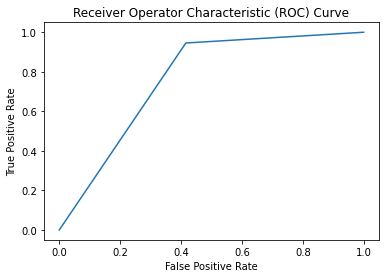

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)
# # Plot the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.show()

Country Plot

In [30]:
def countrycode(search_words, num_items):
  search_with_filter = search_words + " -filter:retweets"
  date_since = "2020-01-01"
  mask = tw.Cursor(api.search,
                  q=search_with_filter,
                  lang="en",
                  since=date_since,
                  result_type = 'recent').items(num_items)
  l_countrycode = []
  for tweet in mask:
    if tweet.place is not None:
      l_countrycode.append(tweet.place.country_code)
  return l_countrycode

**Attitude of Mask -- Pie chart by location**


In [132]:
import matplotlib.pyplot as plt
maskdf = files.upload()
maskdf = pd.read_csv(io.BytesIO(maskdf['JSC270_A4Q2_dataset_countryplot_pos.csv']))
n_maskdf = files.upload()
n_maskdf = pd.read_csv(io.BytesIO(n_maskdf['JSC270_A4Q2_dataset_countryplot_neg.csv']))
maskdf.columns = ['index', 'country_code', 'count']
n_maskdf.columns = ['index', 'country_code', 'count']
sum = n_maskdf['count'].sum() + maskdf['count'].sum()

n_maskdf['proportion'] = n_maskdf['count']/sum
maskdf['proportion'] = maskdf['count']/sum

Saving JSC270_A4Q2_dataset_countryplot_pos.csv to JSC270_A4Q2_dataset_countryplot_pos (8).csv


Saving JSC270_A4Q2_dataset_countryplot_neg.csv to JSC270_A4Q2_dataset_countryplot_neg.csv


1. Positive


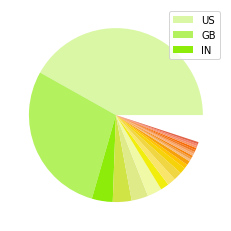

In [134]:
maskdf['proportion'] = maskdf['count']/sum
color2 = ['#DAF7A6','#B4F15F', '#8DEC0A', '#D1E445', '#DFEA88', '#EFF9A6', '#F1ED0D', '#F9E56A', '#F0D643', '#F6D20A', 
          '#FFC300', '#F6A00A', '#F7BB7A', '#F19E47', '#F6830A', '#F7AF7A', '#F79C59', '#F07820', '#F96C04', '#F59769',
          '#F58269', '#E16448', '#E03B16', '#F0350B', '#F69D93', '#D76E62', '#BC3E2F', '#CB1D09', '#900C3F', '#581845']
plt.pie(maskdf['proportion'], colors=color2)
plt.legend(n_maskdf['country_code'])
plt.show()

2. Negative


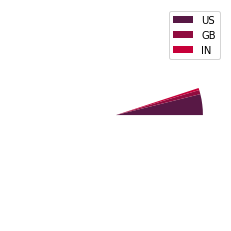

In [133]:
n_maskdf['proportion'] = n_maskdf['count']/sum
color1 = ['#581845', '#900C3F', '#C70039']
plt.pie(n_maskdf['proportion'], colors=color1)
plt.legend(n_maskdf['country_code'])
plt.show()

Research 1: Prediction on someone's attitude about wearing a mask.

In [47]:
def conclusion_maker(lst):
  if sum(lst) == 0:
    return "This media has neautral attitude"
  if sum(lst) < 0:
    return "This media has negative attitude"
  else:
    return "This media has positive attitude"

In [49]:
def predict_attitude(new_df, training_df):
  new_df["tokens"] = tokenize(new_df)
  new_df["tokens"] = no_links(new_df)
  new_df["tokens"] = no_at(new_df)
  new_df["tokens"] = remove_punct(new_df)
  new_df["tokens"] = convert_lower(new_df)
  new_df["tokens"] = stem(new_df)
  new_df["tokens"] = remove_stopwords(new_df)
  new_df["tokens"] = lemmatize(new_df)

  new_X = new_df['tokens'].to_numpy()
  # Count Vectorizer
  count_vec_new = CountVectorizer(
      analyzer='word',
      tokenizer= override_fcn,
      preprocessor= override_fcn,
      token_pattern= None,
      max_features = 5500)

  X, y = training_df['tokens'].to_numpy(), training_df['attitude'].to_numpy()
  full_X_new = np.concatenate([X, new_X])

  counts_new = count_vec_new.fit_transform(full_X_new)

  tfidf_new = TfidfTransformer()

  tfs_new = tfidf_new.fit_transform(counts_new)

  new_X = tfs_new.toarray()

  X, X_test = new_X[:np.size(X), :], new_X[np.size(X):,:]

  nb_new = MultinomialNB()
  nb_new.fit(X, y)

  pred_new = nb_new.predict(X_test)
  return pred_new

The following code is the code we used to produce the 'CDCgov_mask.csv' file

In [81]:
# search_with_filter = "mask" +" from:@CDCgov"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                        q=search_with_filter,
#                        lang="en",
#                        since=date_since,
#                        result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_CDC = pd.DataFrame(a, columns = ['tweet'])
# df_CDC.to_csv('CDCgov_mask.csv') 
# files.download('CDCgov_mask.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
df_CDC = files.upload()
df_CDC = pd.read_csv(io.BytesIO(df_CDC['CDCgov_mask.csv']))

Saving CDCgov_mask.csv to CDCgov_mask (1).csv


In [86]:
print(conclusion_maker(predict_attitude(df_CDC, df)))


This media has positive attitude


The following code is the code we used to produce the 'ABC_mask.csv' file

In [82]:
# search_with_filter = "mask" +" from:@ABC"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                        q=search_with_filter,
#                        lang="en",
#                        since=date_since,
#                        result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_ABC = pd.DataFrame(a, columns = ['tweet'])
# df_ABC.to_csv('ABC_mask.csv') 
# files.download('ABC_mask.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
df_ABC = files.upload()
df_ABC = pd.read_csv(io.BytesIO(df_ABC['ABC_mask.csv']))

Saving ABC_mask.csv to ABC_mask (1).csv


In [88]:
print(conclusion_maker(predict_attitude(df_ABC, df)))

This media has positive attitude


The following code is the code we used to produce the 'NBCNews_mask.csv' file

In [83]:
# search_with_filter = "mask" +" from:@NBCNews"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                        q=search_with_filter,
#                        lang="en",
#                        since=date_since,
#                        result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_NBC = pd.DataFrame(a, columns = ['tweet'])
# df_NBC.to_csv('NBCNews_mask.csv') 
# files.download('NBCNews_mask.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
df_NBC = files.upload()
df_NBC = pd.read_csv(io.BytesIO(df_NBC['NBCNews_mask.csv']))

Saving NBCNews_mask.csv to NBCNews_mask (1).csv


In [90]:
print(conclusion_maker(predict_attitude(df_NBC, df)))

This media has positive attitude


The following code is the code we used to produce the 'CNN_mask.csv' file

In [84]:
# search_with_filter = "mask" +" from:@CNN"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                         q=search_with_filter,
#                         lang="en",
#                         since=date_since,
#                         result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_CNN = pd.DataFrame(a, columns = ['tweet'])
# df_CNN.to_csv('CNN_mask.csv') 
# files.download('CNN_mask.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
df_CNN = files.upload()
df_CNN = pd.read_csv(io.BytesIO(df_CNN['CNN_mask.csv']))

Saving CNN_mask.csv to CNN_mask (1).csv


In [92]:
print(conclusion_maker(predict_attitude(df_CNN, df)))

This media has positive attitude


Test Medias' attitudes on Vaccines

The following code is the code we used to produce the 'ABC_vaccine' file

In [93]:
# search_with_filter = "vaccine" +" from:@ABC"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                         q=search_with_filter,
#                         lang="en",
#                         since=date_since,
#                         result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_ABCv = pd.DataFrame(a, columns = ['tweet'])
# df_ABCv.to_csv('ABC_vaccine.csv') 
# files.download('ABC_vaccine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
df_ABCv = files.upload()
df_ABCv = pd.read_csv(io.BytesIO(df_ABCv['ABC_vaccine.csv']))

Saving ABC_vaccine.csv to ABC_vaccine (1).csv


In [111]:
print(conclusion_maker(predict_attitude(df_ABCv, df3)))

This media has positive attitude


The following code is the code we used to produce the 'NBCNews_vaccine' file

In [94]:
# search_with_filter = "vaccine" +" from:@NBCNews"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                         q=search_with_filter,
#                         lang="en",
#                         since=date_since,
#                         result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_NBCv = pd.DataFrame(a, columns = ['tweet'])
# df_NBCv.to_csv('NBCNews_vaccine.csv') 
# files.download('NBCNews_vaccine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
df_NBCv = files.upload()
df_NBCv = pd.read_csv(io.BytesIO(df_NBCv['NBCNews_vaccine.csv']))

Saving NBCNews_vaccine.csv to NBCNews_vaccine (3).csv


In [114]:
print(conclusion_maker(predict_attitude(df_NBCv, df3)))

This media has positive attitude


The following code is the code we used to produce the 'CNN_vaccine' file

In [95]:
# search_with_filter = "vaccine" +" from:@CNN"
# date_since = "2020-01-01"
# word = tw.Cursor(api.search,
#                         q=search_with_filter,
#                         lang="en",
#                         since=date_since,
#                         result_type = 'recent').items(1000)
# a = [tweet.text for tweet in word]
# df_CNNv = pd.DataFrame(a, columns = ['tweet'])
# df_CNNv.to_csv('CNN_vaccine.csv') 
# files.download('CNN_vaccine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
df_CNNv = files.upload()
df_CNNv = pd.read_csv(io.BytesIO(df_CNNv['CNN_vaccine.csv']))

Saving CNN_vaccine.csv to CNN_vaccine (1).csv


In [115]:
print(conclusion_maker(predict_attitude(df_CNNv, df3)))

This media has positive attitude


Research Question 2: Find tweets associated with masks, predict people's attitude using our model and to see how does the proportion of people who support masks change over time

The following code is the code we used to produce the 'question_2_proportion.csv' file

In [116]:
# def create_sample(date1):
#   search_words = '(covid.*mask|mask.*covid)|(covid.*mask.*covid)'
#   search_with_filter = search_words + " -filter:retweets"
#   date_since = date1
#   mask = tw.Cursor(api.search,
#                         q=search_with_filter,
#                         lang="en",
#                         since=date_since,
#                         result_type = 'recent').items(2000)
#   a = [tweet.text for tweet in mask]
#   return pd.DataFrame(a, columns = ['tweet'])

# df2 = create_sample("2021-01-01")
# df2.to_csv('question_2_proportion.csv') 
# files.download('question_2_proportion.csv')

In [125]:
df2 = files.upload()
df2 = pd.read_csv(io.BytesIO(df2['question_2_proportion.csv']))

Saving question_2_proportion.csv to question_2_proportion.csv


In [126]:
df2

,Unnamed: 0,tweet
0,0,"Even if you've got your COVID-19 shot, keep yo..."
1,1,@Oisin16 “Should you be wearing a mask?”\n“I d...
2,2,my “‘covid isn’t real!’ ‘wearing a mask is use...
3,3,"I lost a parent to COVID, so excuse me if I ha..."
4,4,@puhpuhpuhpow @bridget_joy_ That’s what I thou...
...,...,...
1995,1995,Covid can not be prevented by wearing a mask o...
1996,1996,@MicheleJeanne3 @KVandetti Don’t depend on the...
1997,1997,@dardedil00 @User12392118389 @Shafqat_Mahmood ...
1998,1998,The high-tech COVID smart face mask from Razer...


In [127]:
df2["tokens"] = tokenize(df2)
df2["tokens"] = no_links(df2)
df2["tokens"] = no_at(df2)
df2["tokens"] = remove_punct(df2)
df2["tokens"] = convert_lower(df2)
df2["tokens"] = stem(df2)
df2["tokens"] = remove_stopwords(df2)
df2["tokens"] = lemmatize(df2)
df2

,Unnamed: 0,tweet,tokens
0,0,"Even if you've got your COVID-19 shot, keep yo...","[even, youv, got, covid19, shot, keep, mask, d..."
1,1,@Oisin16 “Should you be wearing a mask?”\n“I d...,"[wear, mask, dont, covid, went, thi, know, oka..."
2,2,my “‘covid isn’t real!’ ‘wearing a mask is use...,"[covid, isnt, real, wear, mask, useless, mom, ..."
3,3,"I lost a parent to COVID, so excuse me if I ha...","[lost, parent, covid, excus, zero, toler, anti..."
4,4,@puhpuhpuhpow @bridget_joy_ That’s what I thou...,"[thought, yesterday, dr, told, theyr, find, fu..."
...,...,...,...
1995,1995,Covid can not be prevented by wearing a mask o...,"[covid, prevent, wear, mask, chin, even, thoug..."
1996,1996,@MicheleJeanne3 @KVandetti Don’t depend on the...,"[dont, depend, medium, govern, 2, tell, u, tru..."
1997,1997,@dardedil00 @User12392118389 @Shafqat_Mahmood ...,"[lmaooo, sister, stupid, wear, mask, w]"
1998,1998,The high-tech COVID smart face mask from Razer...,"[hightech, covid, smart, face, mask, razer, of..."


In [128]:
part2_X = df2['tokens'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 5500)

X, y = df['tokens'].to_numpy(), df['attitude'].to_numpy()


# Remember this output is a Scipy Sparse Array
full_X = np.concatenate([X, part2_X])

part2_counts = count_vec.fit_transform(full_X)

tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(part2_counts)

part2_X = tfs.toarray()

X, monthX = part2_X[:np.size(X), :], part2_X[np.size(X):,:]

nb = MultinomialNB()
nb.fit(X, y)

part2_pred = nb.predict(monthX)

In [129]:
np.sum(part2_pred == 1)/2000

0.923

Research Question 3 Vaccine

The following codes are the code we used for searching and labeling the vaccine datas and save into 'JSC270_A4Q2_dataset_vaccine.csv' file

In [ ]:
# vacdf1 = search_positive('#vaccinated', 1000)
# vacdf2 = search_positive('#doyourpart', 300)
# vacdf3 = search_positive('#vaccinate', 900)

In [ ]:
# no_vacdf1 = search_negative('#novaccine', 150)
# no_vacdf2 = search_negative('#novaccinepassport', 150)
# no_vacdf3 = search_negative('#novaccineforme', 200)
# no_vacdf4 = search_negative('#antivaxxers', 300)
# no_vacdf5 = search_negative('#antivaccine', 100)
# no_vacdf6 = search_negative('#antivaxxer', 100)
# no_vacdf7 = search_negative('#antivax', 200)

In [ ]:
# frame_vec = [vacdf1, vacdf2, vacdf3, no_vacdf1, no_vacdf2, no_vacdf3, no_vacdf4, no_vacdf5, no_vacdf6, no_vacdf7]
# df3 = pd.concat(frame_vec)
# df3.to_csv('JSC270_A4Q2_dataset_vaccine')
# files.download('JSC270_A4Q2_dataset_vaccine')

In [101]:
df3 = files.upload()
df3 = pd.read_csv(io.BytesIO(df3['JSC270_A4Q2_dataset_vaccine.csv']))

Saving JSC270_A4Q2_dataset_vaccine.csv to JSC270_A4Q2_dataset_vaccine (1).csv


In [102]:
df3["tokens"] = tokenize(df3)
df3["tokens"] = no_links(df3)
df3["tokens"] = no_at(df3)
df3["tokens"] = remove_punct(df3)
df3["tokens"] = convert_lower(df3)
df3["tokens"] = stem(df3)
df3["tokens"] = remove_stopwords(df3)
df3["tokens"] = lemmatize(df3)

In [103]:
df3['tokens'] = remove_tag(df3, '^#[vV][aA][cC][cC][iI][nN][aA][tT][eE][dD].*$')
df3['tokens'] = remove_tag(df3, '^#[dD][oO][yY][oO][uU][rR][pP][aA][rR][tT].*$')
df3['tokens'] = remove_tag(df3, '^#[vV][aA][cC][cC][iI][nN][aA][tT][eE].*$')
df3['tokens'] = remove_tag(df3, '^#[nN][oO][vV][aA][cC][cC][iI][nN][eE].*$')
df3['tokens'] = remove_tag(df3, '^#[nN][oO][vV][aA][cC][cC][iI][nN][eE][pP][aA][sS][sS][pP][oO][rR][tT].*$')
df3['tokens'] = remove_tag(df3, '^#[nN][oO][vV][aA][cC][cC][iI][nN][eE][fF][oO][rR][mM][eE].*$')
df3['tokens'] = remove_tag(df3, '^#[aA][nN][tT][iI][vV][aA][xX][xX][eE][rR][sS].*$')
df3['tokens'] = remove_tag(df3, '^#[aA][nN][tT][iI][vV][aA][cC][cC][iI][nN][eE].*$')
df3['tokens'] = remove_tag(df3, '^#[aA][nN][tT][iI][vV][aA][xX][xX][eE][rR].*$')
df3['tokens'] = remove_tag(df3, '^#[aA][nN][tT][iI][vV][aA][xX].*$')

In [104]:
X3, y3 = df3['tokens'].to_numpy(), df3['attitude'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec3 = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts3 = count_vec3.fit_transform(X3)

In [105]:
tfidf3 = TfidfTransformer()

tfs3 = tfidf3.fit_transform(counts3)

print(tfs3.toarray())

# Let's use the TFIDF counts for modelling
X3 = tfs3.toarray()

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Test accuracy with simple Naive Bayes: 0.8432122370936902


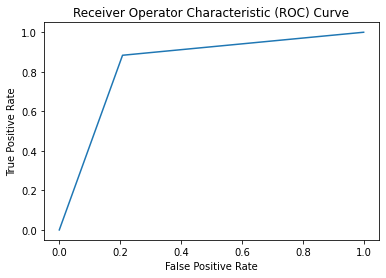

In [106]:
nb3 = MultinomialNB()
# Fit model to training data
nb3.fit(X_train3, y_train3)
# Predict on test data
y_preds3 = nb3.predict(X_test3)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test3,y_preds3))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)


# # Plot the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test3, y_preds3, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.show()

Use model for vaccine to predict for wearing mask, to see if we can get some interesting findings

In [107]:
len(X_train3)

2088

In [108]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Test accuracy with simple Naive Bayes: 0.7081577939486786


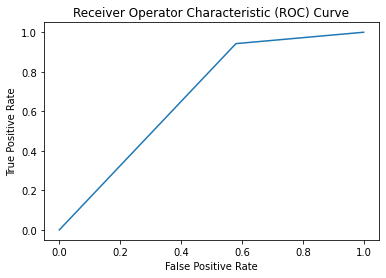

In [109]:
X, y = df['tokens'].to_numpy(), df['attitude'].to_numpy()
X2, y2 = df3['tokens'].to_numpy(), df3['attitude'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
full_X = np.concatenate([X, X2])

counts = count_vec.fit_transform(full_X)

tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

mv_X = tfs.toarray()

X, X2 = mv_X[:np.size(X), :], mv_X[np.size(X):,:]

nb = MultinomialNB()
nb.fit(X, y)

pred = nb.predict(X2)

print('Test accuracy with simple Naive Bayes:',accuracy_score(pred,y2))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)


# # Plot the ROC curve 
fpr, tpr, thresholds = roc_curve(y2,pred, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.show()

Test accuracy with simple Naive Bayes: 0.674373795761079


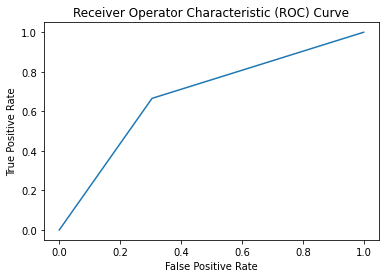

In [110]:
nb = MultinomialNB()
nb.fit(X2, y2)

pred = nb.predict(X)

print('Test accuracy with simple Naive Bayes:',accuracy_score(pred,y))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)


# # Plot the ROC curve 
fpr, tpr, thresholds = roc_curve(y,pred, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.show()